# Oct22_Advanced_Plots_And_Widgets.ipynb

## Plotting Multiple Curves

In [1]:
from pylab import *

For several examples of the same curve type, use vertical offsets for visibility.

For example, consider plotting sin$(x)$, sin$(2x)$, sin$(3x)$, sin$(4x)$.

In [2]:
x = linspace(0,2*pi,100)

y1 = sin(x)
y2 = sin(2.0*x)
y3 = sin(3.0*x)
y4 = sin(4.0*x)

In [3]:
rcParams.update({'font.size': 22})

Text(0.5, 1.0, 'multiple sine curves: bad example')

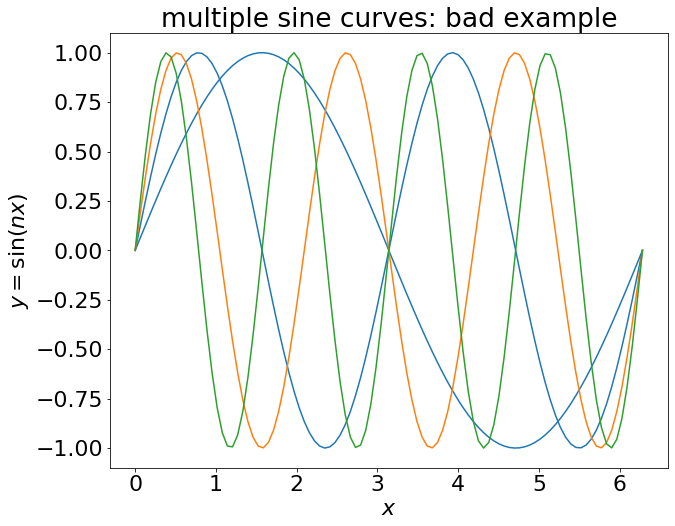

In [4]:
fig1 = figure(figsize=(10,8))
plt.plot(x,y1,c='C0')
plot(x,y2)
plot(x,y3)
plot(x,y4)
xlabel('$x$')
ylabel('$y = \sin(nx)$')
title('multiple sine curves: bad example')

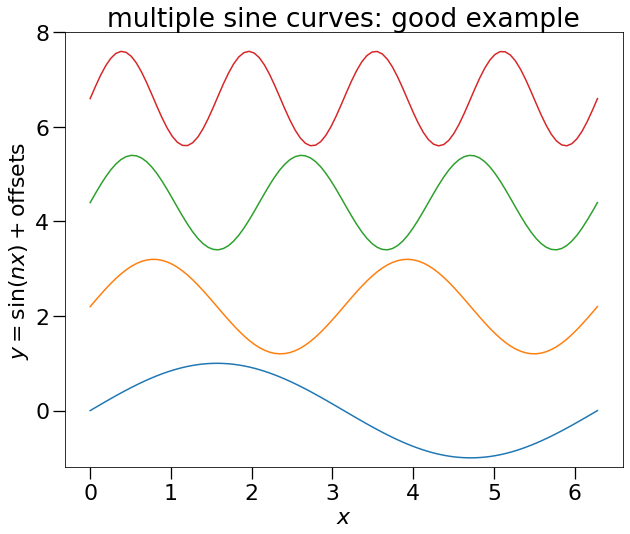

In [5]:
fig2 = figure(figsize=(10,8))
plot(x,y1)
plot(x,y2 + 2.2)
plot(x,y3 + 4.4)
plot(x,y4 + 6.6)
xlabel('$x$')
ylabel('$y = \sin(nx)+ \mathrm{offsets}$')
title('multiple sine curves: good example')
ylim(-1.2,8)
tick_params('both', length=12, width=1.3, which='major') 
#grid('on')

## Multi-panel Plots

Alternatively, you can use "subplots" to do multi-panel plots.

In the following, show the sine curves in 2 x 2 and 4 x 1 styles.

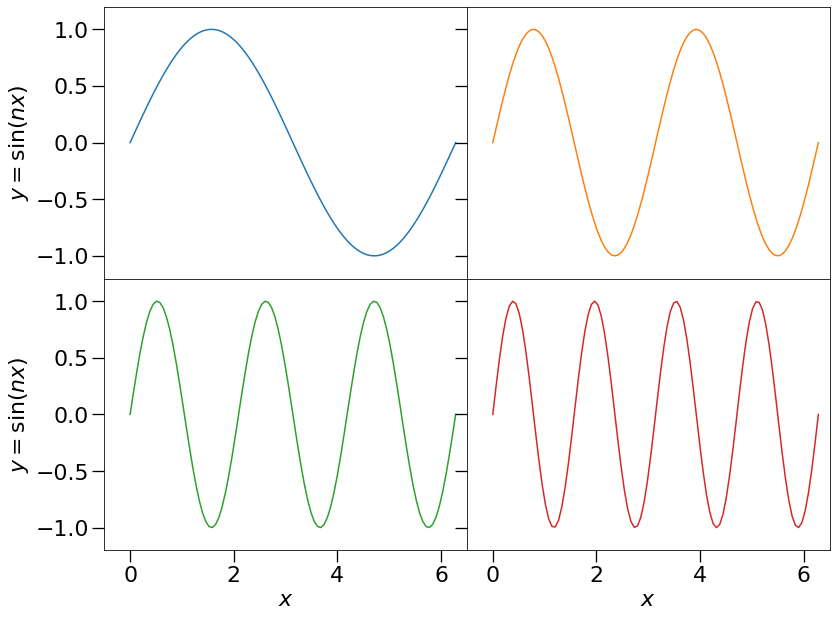

In [6]:
# make a plot with 4 panels, arranged 2x2
# sharex and sharey give the plots the same axis limits and take out tickmark labels when necessary
fig3, axes = subplots(2, 2, sharex=True, sharey=True, figsize=(13,10))

# take out spaces between panels:
fig3.subplots_adjust(hspace=0,wspace=0)

# unpack axis labels from matrix:
ax1, ax2, ax3, ax4 = axes[0,0], axes[0,1], axes[1,0], axes[1,1]

ax1.plot(x,y1)
ax2.plot(x,y2,'C1') # next color in (new) standard palette
ax3.plot(x,y3,'C2')
ax4.plot(x,y4,'C3')

ax3.set_xlabel('$x$')
ax4.set_xlabel('$x$')
ax1.set_ylabel('$y = \sin(nx)$')
ax3.set_ylabel('$y = \sin(nx)$')

ax1.set_xlim(-0.5,6.5)
ax1.set_ylim(-1.2,1.2)

ax1.tick_params('both', length=12, width=1.3, which='major') 
ax2.tick_params('both', length=12, width=1.3, which='major') 
ax3.tick_params('both', length=12, width=1.3, which='major') 
ax4.tick_params('both', length=12, width=1.3, which='major') 


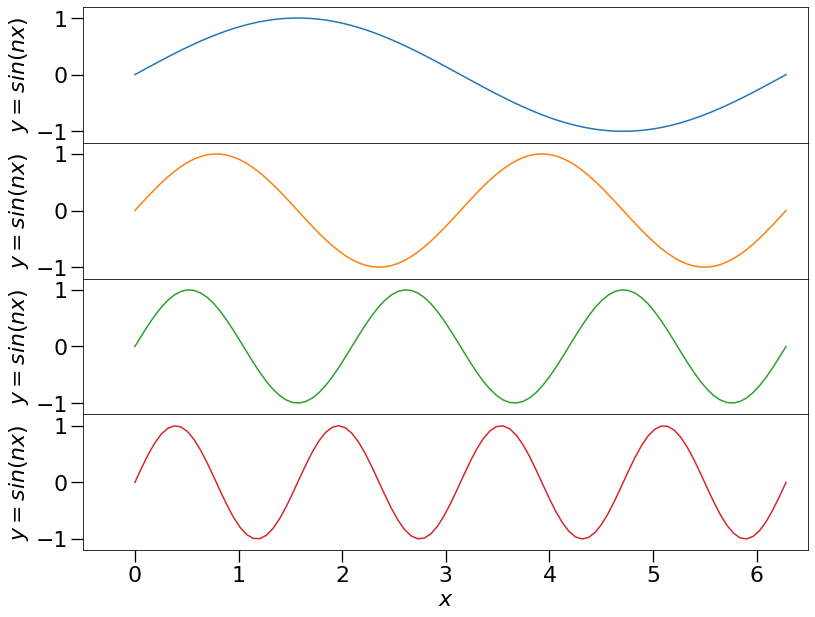

In [7]:
# make a plot with 4 panels, arranged vertically:
fig4, (ax1, ax2, ax3, ax4) = subplots(4, 1, sharex=True, sharey=True, figsize=(13,10))
fig4.subplots_adjust(hspace=0,wspace=0)

ax1.plot(x,y1)
ax2.plot(x,y2,'C1')
ax3.plot(x,y3,'C2')
ax4.plot(x,y4,'C3')

ax4.set_xlabel('$x$')

for ax in (ax1,ax2,ax3,ax4):
    ax.set_ylabel('$y = sin(nx)$')

ax1.set_xlim(-0.5,6.5)
ax2.set_ylim(-1.2,1.2)

ax1.tick_params('both', length=12, width=1.3, which='major') 
ax2.tick_params('both', length=12, width=1.3, which='major') 
ax3.tick_params('both', length=12, width=1.3, which='major') 
ax4.tick_params('both', length=12, width=1.3, which='major') 


## Widgets

Jupyter notebook widgets allow for interactive calculations using sliders and selection buttons. 

Consider the following code segments that together set up a widget that plots a filled circle and allows the user to interactively change the color, size, and location of the circle.

In [1]:
from pylab import *
from ipywidgets import interact #First, import interact from ipywidgets

Here we set up a function that makes the plot, and is just given the various free parameter(s) as input -- in this case the parameters are the size of the circle, its $x$ and $y$ coordinates, its color, and an option to turn the plot grid on or off.

In [6]:
def make_circle(size,x,y,Color) :
    fig1 = figure(figsize=(5,5))
    plot([x],[y],'o',color=Color,ms=size)
    xlim(-1,1)
    ylim(-1,1)
    show() # this may not be required in some versions (may require % matplotlib inline)

Now we call the plotting function using the 'interact()' function, with various parameter inputs given:

* 'size', 'x', and 'y' all provide continuous values, with the min/max range and stepsize specified

* 'Color' is a multiple-choice button

* 'Grid' is a True/False button

In [7]:
interact(make_circle, size=(5,100,1), x=(-1,1,0.1), y=(-1,1,0.1), \
         Color={'red': 'r', 'green': 'g', 'blue': 'b'});

interactive(children=(IntSlider(value=52, description='size', min=5), FloatSlider(value=0.0, description='x', …

# Animations

You can also animate specific physics problems. Here we will consider the case of a simple pendulum.

You will want to follow the precise syntax and steps below.

In [11]:
from pylab import *
mpl.rcParams['animation.convert_path'] = 'magick' #This is absolutely needed due to a bug with ImageMagick and Windows
# some animation methods adapted from Jake Vanderplas, http://jakevdp.github.com
from matplotlib.animation import *

In [12]:
def pendul_init():     # initialize blank frames
    string.set_data([],[])
    bob.set_data([],[])
    theta_text.set_text('')
    return string, bob, theta_text

def pendul_frame(i): # frame number i
    x_string = r * sin(theta[i])
    y_string = -r * cos(theta[i])
    string.set_data(x_string, y_string)
    bob.set_data(x_string[1], y_string[1])
    theta_text.set_text('$\\theta = %.1f^\circ$' % degrees(theta[i]))
    return string, bob, theta_text

In [13]:
# user input of max angle

theta_maxd = eval(input('Give me the max angle [deg] : '))

# convert degrees to radians :
theta_maxr = radians(theta_maxd)

# period of the pendulum :
T_s = 1.0 # setting g = L = 1

# time vector :
t = linspace(0,T_s,100)

# analytical solution for small-angle approximation :
theta = theta_maxr * cos(2.0 * pi * t / T_s)

# convert to x,y coordinates :
x = sin(theta)
y = -cos(theta)

rcParams.update({'font.size': 18})

r = array([0.,1.])   # pendulum string

Give me the max angle [deg] : 45


In [14]:
%matplotlib notebook

<IPython.core.display.Javascript object>


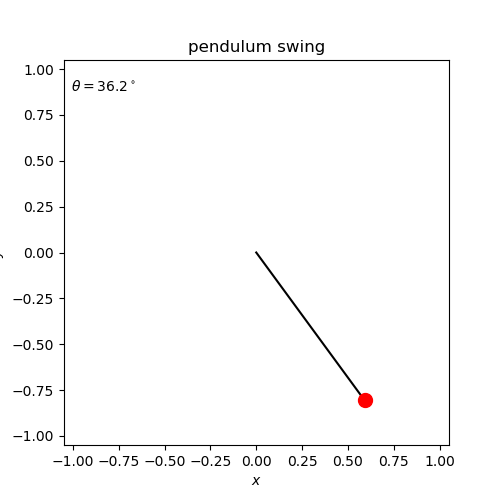

Text(0.5, 1.0, 'pendulum swing')

In [15]:
# Set up figure frame:
fig1 = figure(figsize=(5,5))
ax = fig1.add_subplot(111,aspect='equal',xlim=(-1.05,1.05),ylim=(-1.05,1.05))
string, = ax.plot([],[],'-k',lw=1.5)
bob, = ax.plot([],[],'or',markersize=10)
theta_text = ax.text(0.02, 0.92, '', transform=ax.transAxes)
xlabel('$x$')
ylabel('$y$')
title('pendulum swing')

In [17]:
# Animate with a 50 ms delay:
ani = FuncAnimation(fig1, pendul_frame, init_func=pendul_init, frames=len(t), interval=50)
show()

## You can also do animations in 3D. Below is a 3D pendulum.

In [18]:
from mpl_toolkits.mplot3d import Axes3D

In [19]:
def pendul_init():     # initialize blank frames
    string.set_data([],[])
    string.set_3d_properties([])
    bob.set_data([],[])
    bob.set_3d_properties([])
    theta_text.set_text('')
    return string, bob, theta_text

def pendul_frame(i): # frame number i
    x = r * sin(theta[i])
    y = r * 0.0
    z = -r * cos(theta[i])
    string.set_data(x, y)
    string.set_3d_properties(z)
    bob.set_data(x[1], y[1])
    bob.set_3d_properties(z[1])
    theta_text.set_text('$\\theta = %.1f^\circ$' % degrees(theta[i]))
    ax.view_init(30,2.0*i)
    fig1.canvas.draw()
    return string, bob, theta_text


Give max angle [deg] : 45


<IPython.core.display.Javascript object>


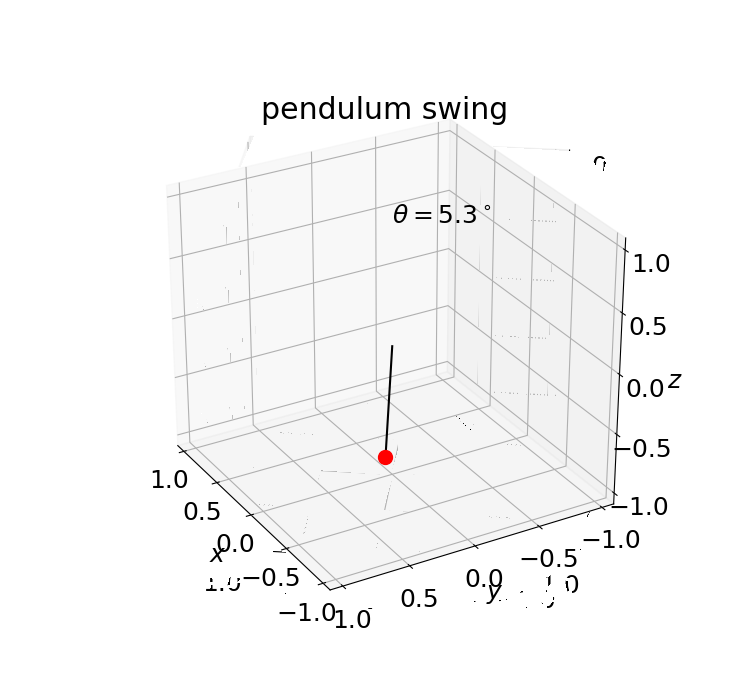

Text(0.5, 0.92, 'pendulum swing')

In [20]:
theta_max = eval(input('Give max angle [deg] : '))
theta_rad = radians(theta_max)

# time vector :
t = linspace(0.,10.0*2.0*pi,200)

# analytical solution for small-angle approximation :
theta = theta_rad * cos(t) 
  
rcParams.update({'font.size': 18})

r = array([0.,1.])   # pendulum string

# set up figure frame:
fig1 = figure(figsize=(7.5,7))
ax = fig1.gca(projection='3d')
string, = ax.plot([],[],[],'-k',lw=1.5)
bob, = ax.plot([],[],[],'or',markersize=10)
theta_text = ax.text(0.0, 0.0, 1.0, '')
xlabel('$x$')
ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_xlim(-1.05,1.05)
ax.set_ylim(-1.05,1.05)
ax.set_zlim(-1.05,1.05)
ax.view_init(30,75)
title('pendulum swing')


In [21]:
# 50 ms delay:
ani = FuncAnimation(fig1, pendul_frame, init_func=pendul_init, frames=len(theta), interval=50)

## Next, let's do a sine wave propagating in 3D

In [22]:
def wave_frame(i): # frame number i
    ax.clear()
    Z = sin(X+t[i]*1.0)
#    Z = sin(sqrt(X**2+Y**2+t[i]*2.0))
    waves = ax.plot_surface(X,Y,Z, rstride=3, cstride=3, cmap=cm.jet)
#    wave_text.set_text('frame = %d' % (i))
#    ax.view_init(30,45+0.3*i)
    fig1.canvas.draw()
    return waves

<IPython.core.display.Javascript object>


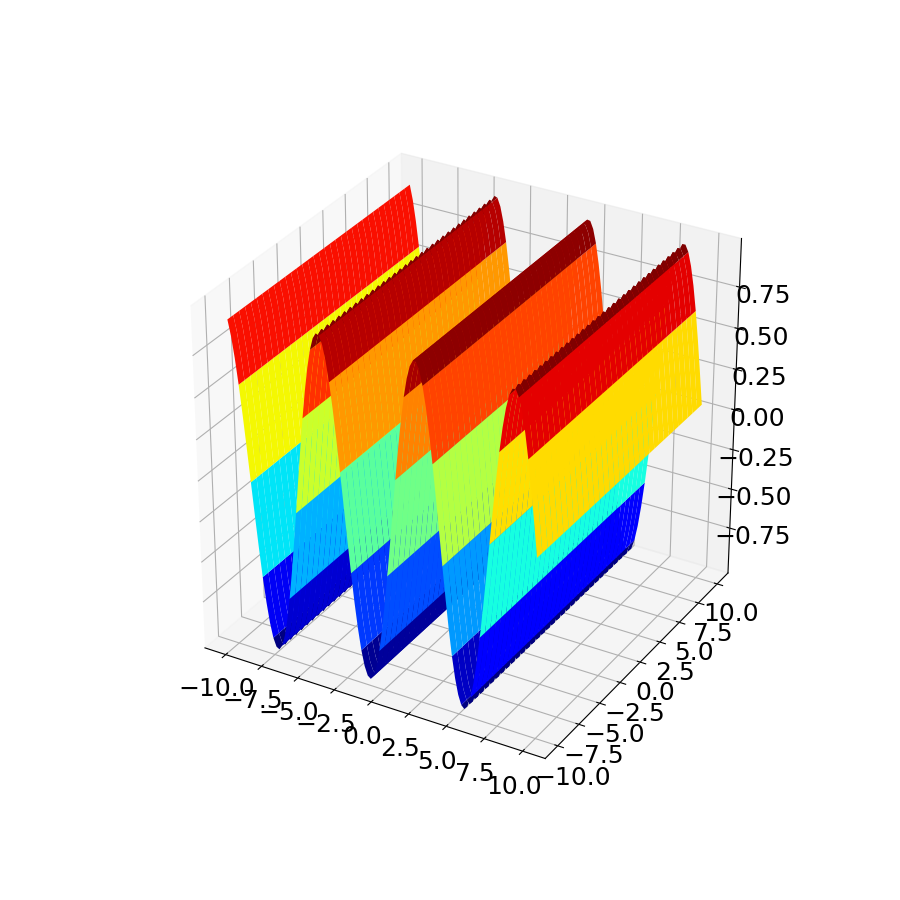

Text(0.5, 0, '$z$')

In [23]:
# time vector :
t = linspace(0.,10.0*2.0*pi,100)
x = linspace(-10,10,100)
y = copy(x)

X,Y = meshgrid(x,y)

# sine wave :
Z = sin(X)

# radial sine wave : 
#Z = sin(sqrt(X**2+Y**2))

rcParams.update({'font.size': 18})

# set up figure frame:

fig1 = figure(figsize=(9,9))
ax = fig1.gca(projection='3d')
#waves, = ax.plot_surface(X,Y,Z, rstride=3, cstride=3, cmap=cm.jet)
xlabel('$x$')
ylabel('$y$')
ax.set_zlabel('$z$')
#wave_text = ax.text(0.0, 0.0, 1.0, '')


In [24]:
# 50 ms delay:
ani = FuncAnimation(fig1, wave_frame, frames=len(t), interval=5)

# Finally, as the last thing, let's look at a nice, html formatted data table

In [25]:
%matplotlib inline

In [26]:
##########  Data Table  ##############################################
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
######################################################################

In [27]:
A = array([ 0, 5, 10, 15, 20]) #length in cm
B = array([ 1, 2, 3, 4, 5])    #Temperature in K
C = array([ -3, -2, 1, 2, 3])  #Magn. field in mT

In [28]:
table = ListTable()
table.append(['$A$ [cm]','$B$ [K]','$C$ [mT]'])
for i in range(len(A)) :
    table.append([A[i],B[i], C[i]])
table

$A$ [cm],$B$ [K],$C$ [mT]
0,1,-3
5,2,-2
10,3,1
15,4,2
20,5,3
